Домашнее задание
Сбор и разметка данных (семинары)
1. Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.

2. Загрузите датасет в pandas DataFrame под названием df.

In [3]:
# У нас есть 2 таблицы - test и train, видимо для машинного обучения. Берем только таблицу train, так как в test отсутствует много значений
# SalePrice
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv')

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

3. Выполните предварительную обработку данных, выполнив следующие шаги:

a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями).

In [7]:
# Посмотрим в целом на данные
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [8]:
# Посмотрим на пустые значения в таблице
pd.set_option('display.max_rows', None)
df.isnull().sum()[df.isnull().sum().gt(0)]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [9]:
# Например, отсутствуют данные по median_LotFrontage (Длина улицы в линейных футах, соединенной с объектом недвижимости)
# Посчитаем медианное значение
median_LotFrontage = df['LotFrontage'].median()
median_LotFrontage

68.0

In [10]:
# и заполним пустые значения LotFrontage медианным
df['LotFrontage'] = df['LotFrontage'].fillna(median_LotFrontage)

In [11]:
# проверим, что теперь в LotFrontage заполнены все значения
df.LotFrontage.info()

<class 'pandas.core.series.Series'>
Index: 2919 entries, 0 to 1458
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
2919 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


b. Проверьте и обработайте любые дублирующиеся строки в датасете.

In [13]:
# Проверим данные на наличие дубликатов
duplicates = df.duplicated()
duplicates_df = df[duplicates]
duplicates_df

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [14]:
# Дубликатов нет

c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

In [15]:
# Собственно, преобразовывать нечего - текстовые значени содержатся в объектах, числовае в int64 и float64

Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: 
a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? 

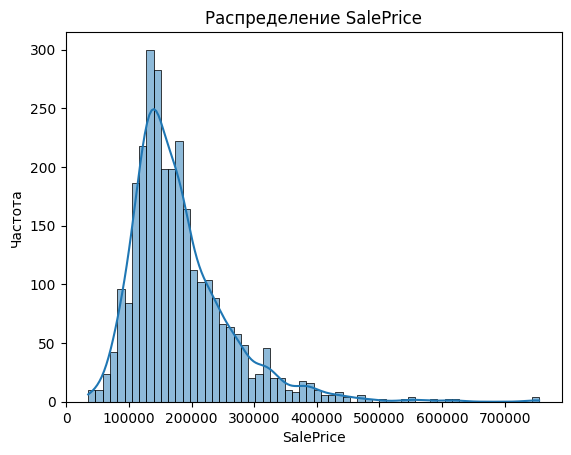

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение графика распределения SalePrice
sns.histplot(data=df, x='SalePrice', kde=True)
plt.title('Распределение SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()


b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? 

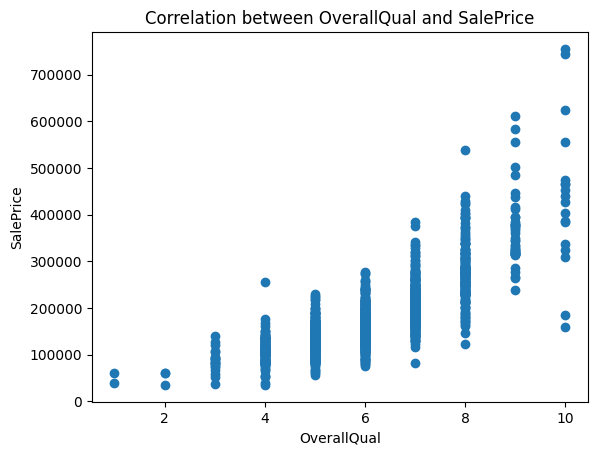

Корреляция между OverallQual и SalePrice: 0.7909816005838051


In [23]:
# Построим график корреляции между OverallQual and SalePrice
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.title('Корреляция между OverallQual and SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

# Вычисление корреляции
correlation = df['OverallQual'].corr(df['SalePrice'])
print('Корреляция между OverallQual и SalePrice:', correlation)

Корреляция присутствует.

c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. 

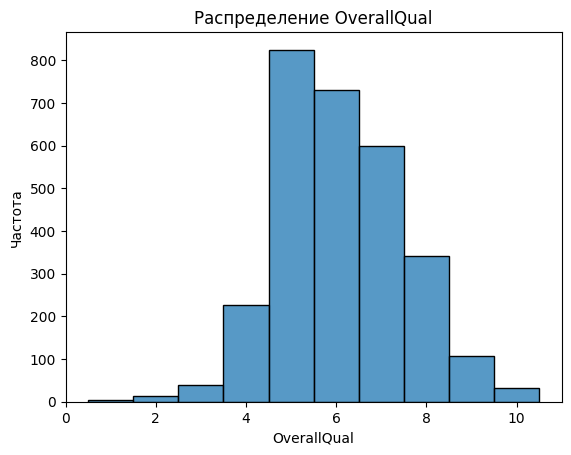

In [24]:
# Построение графика распределения OverallQual
sns.histplot(data=df, x='OverallQual', discrete=True)
plt.title('Распределение OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('Частота')
plt.show()

Распределение нормальное, вылетов нет.

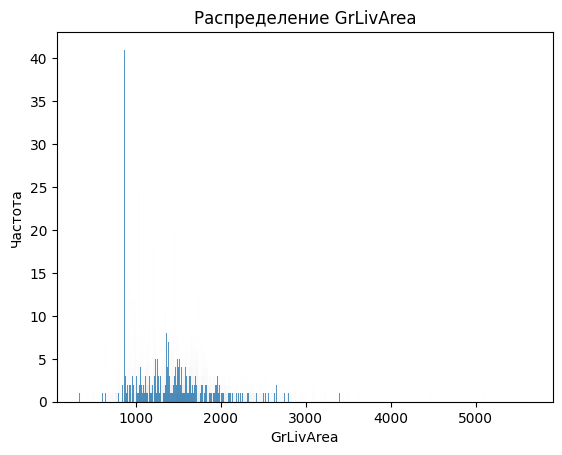

In [27]:
# Построение графика распределения GrLivArea
sns.histplot(data=df, x='GrLivArea', discrete=True)
plt.title('Распределение GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Частота')
plt.show()

d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной.

b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

6. Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [18]:
df.to_csv('cleaned_house_prices.csv', index=False)